<a href="https://colab.research.google.com/github/partylikeits1983/Quantitative_Finance_JupyterNotebooks/blob/main/MediumArticleChartsBTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Below is the code used to produce the volatility charts for the Medium article.**
#### Sources for the code are yfinance and pandas documentation as well as stackoverflow. 

####Feel free to use this code in your own projects.




#### importing dependencies

In [53]:
!pip install yfinance
!pip install arch

In [55]:
import pandas as pd
import yfinance as yf
from arch import arch_model
from arch.__future__ import reindexing
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

####Downloading historical data for Bitcoin using yfinance

##### If you want to download historical data on a smaller timeframe use Binance API

In [56]:
df = yf.download("BTC-USD", start="2014-09-17", end="2021-07-19")

[*********************100%***********************]  1 of 1 completed


In [57]:

df1 = yf.download("SPY", start="2014-09-17", end="2021-07-19")

[*********************100%***********************]  1 of 1 completed


In [17]:

#df1.drop('Volume', axis=1, inplace=True)

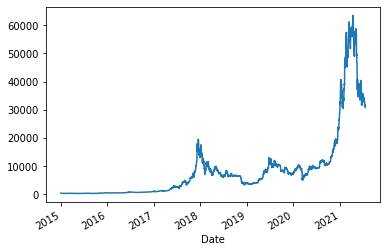

In [58]:
df['Close']['2015-01':'2021-07'].plot();

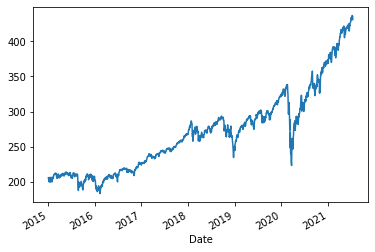

In [59]:
df1['Close']['2015-01':'2021-07'].plot();

#### Calculating daily return and adding the arbitrary -7 percent circuit breaker. 


#####The breaker does get triggered to the upside, but not as much as it is triggered when price moves to the downside. This is simply to visualize how often the circuit breaker would be triggered if Bitcoin were traded on the NYSE. Just a thought expirement. 




In [60]:
df['Return'] = 100 * (df['Close'].pct_change())

In [61]:
df['circuitbreak'] = -7

In [62]:
df1['Return'] = 100 * (df1['Close'].pct_change())

In [63]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,circuitbreak
Date,,,,,,,,
2021-07-15,32827.875000,33159.640625,31175.708984,31780.730469,31780.730469,21300524237,-3.173500,-7
2021-07-16,31841.550781,32218.406250,31100.673828,31421.539062,31421.539062,23699476918,-1.130218,-7
2021-07-17,31397.308594,31935.945312,31223.990234,31533.068359,31533.068359,18895018942,0.354945,-7
2021-07-18,31533.884766,32398.996094,31215.492188,31796.810547,31796.810547,18787986667,0.836399,-7
2021-07-19,31800.011719,31885.859375,30563.734375,30817.832031,30817.832031,20434789545,-3.078858,-7


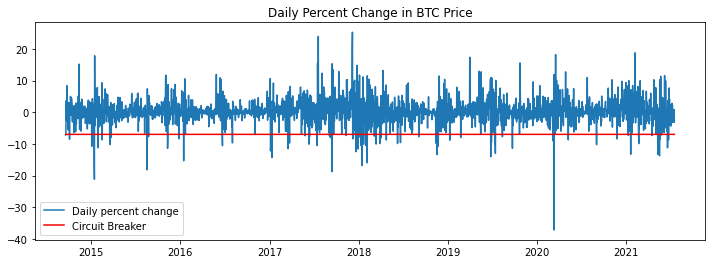

In [64]:
df.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(df['Return'], label = 'Daily percent change')
plt.plot(df['circuitbreak'], "#f20000", label = 'Circuit Breaker')

plt.legend(loc='lower left')
plt.title('Daily Percent Change in BTC Price')
plt.show()

In [65]:
fig.savefig('volatilitydailyBTC.jpeg', dpi=500, bbox_inches='tight')
files.download("volatilitydailyBTC.jpeg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:

df1['circuitbreak'] = -7
df1.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,circuitbreak
Date,,,,,,,,
2021-07-12,435.429993,437.350006,434.970001,437.079987,437.079987,52889600,0.358192,-7
2021-07-13,436.239990,437.839996,435.309998,435.589996,435.589996,52911300,-0.340896,-7
2021-07-14,437.399994,437.920013,434.910004,436.239990,436.239990,64130400,0.149221,-7
2021-07-15,434.809998,435.529999,432.720001,434.750000,434.750000,55126400,-0.341553,-7
2021-07-16,436.010010,436.059998,430.920013,431.339996,431.339996,75784700,-0.784360,-7


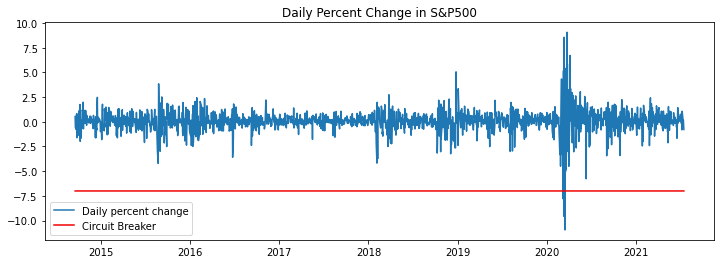

In [67]:
df1.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(df1['Return'], label = 'Daily percent change')
plt.plot(df1['circuitbreak'], "#f20000", label = 'Circuit Breaker')

plt.legend(loc='lower left')
plt.title('Daily Percent Change in S&P500')
plt.show()

In [ ]:
fig.savefig('volatilitydailySPY.jpeg', dpi=500, bbox_inches='tight')
files.download('volatilitydailySPY.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Calculating volatility and Rolling volatility**

####Understanding volatility: https://www.investopedia.com/terms/v/volatility.asp




###*** Annualized 30 Day Rolling Volatility = Standard Deviation of the last 30 day percentage changes in Total Return Price * (Square root of # of days traded per year)***

####365 for Bitcoin because thats how many days per year BTC is traded. 
####253 for S&P500  because thats how many days per year SPY is traded. 


**Why 253?**

The NYSE and NASDAQ average about 253 trading days a year. This is from 365.25 (days on average per year) * 5/7 (proportion work days per week) - 6 (weekday holidays) - 3*5/7 (fixed date holidays) = 252.75 ≈ 253



#### BTC volatility

In [68]:
daily_volatility = df['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(30) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(365) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

Daily volatility:  3.92%
Monthly volatility:  21.49%
Annual volatility:  74.96%


####SPY volatility

In [69]:
daily_volatility = df1['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(20) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(253) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

Daily volatility:  1.13%
Monthly volatility:  5.04%
Annual volatility:  17.93%


In [70]:
window_size = (30)

In [76]:
# Here's the implementation of the 30 day rolling volatility for BTC
volatility = df.pct_change().rolling(window_size).std()*(365**0.5)

In [77]:
volatility.drop('Return', axis=1, inplace=True)
volatility.drop('circuitbreak', axis=1, inplace=True)

In [78]:
volatility.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-15,0.752234,0.596565,0.741468,0.757552,0.757552,3.257854
2021-07-16,0.756841,0.599904,0.734187,0.741165,0.741165,3.242901
2021-07-17,0.744515,0.596573,0.733410,0.741855,0.741855,3.313393
2021-07-18,0.745366,0.592768,0.708123,0.716975,0.716975,3.312845
2021-07-19,0.721277,0.576241,0.710501,0.723392,0.723392,3.293842


In [79]:
volatility['Close%'] = 100 * volatility['Close']

In [81]:
volatility.tail()

,Open,High,Low,Close,Adj Close,Volume,Close%
Date,,,,,,,
2021-07-15,0.752234,0.596565,0.741468,0.757552,0.757552,3.257854,75.755169
2021-07-16,0.756841,0.599904,0.734187,0.741165,0.741165,3.242901,74.116467
2021-07-17,0.744515,0.596573,0.733410,0.741855,0.741855,3.313393,74.185534
2021-07-18,0.745366,0.592768,0.708123,0.716975,0.716975,3.312845,71.697548
2021-07-19,0.721277,0.576241,0.710501,0.723392,0.723392,3.293842,72.339207


In [82]:
volatility.mean(axis = 0)

Open          0.674653
High          0.607728
Low           0.649627
Close         0.677659
Adj Close     0.677659
Volume        6.330304
Close%       67.765909
dtype: float64

In [83]:
volatility['Average Volatility'] = 67.8

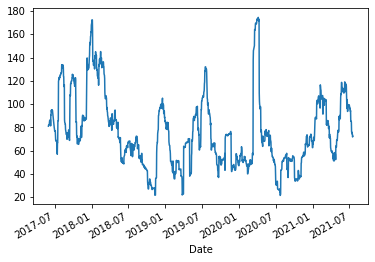

In [84]:
volatility['Close%']['2017-05-31':'2021-07-20'].plot();

###**Creating Charts**

In [85]:
import matplotlib.ticker as mtick

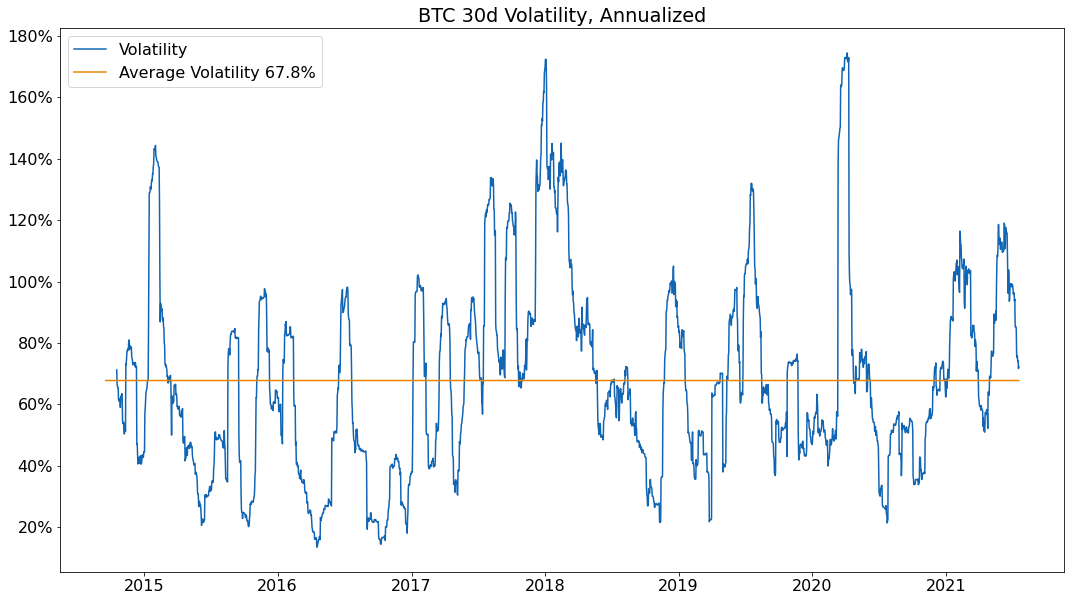

In [86]:
plt.rcParams.update({'font.size': 16})

# x-axis & y-axis values
x = volatility.index
y = volatility['Close%']
z = volatility['Average Volatility']

# create a figure and axes
fig, ax = plt.subplots()


fig.set_figwidth(18)
fig.set_figheight(10)
  
# setting title to graph
ax.set_title('BTC 30d Volatility, Annualized')
  
# label x-axis and y-axis

#ax.set_xlabel('Date')
  
fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


# function to plot and show graph

plt.plot(x, y, "#1265b3", label = 'Volatility')

plt.plot(x, z, "#e88400", label = 'Average Volatility 67.8%')
plt.legend(loc='upper left')

#ax.plot(x, y, z)
plt.show()


In [42]:
fig.savefig('volatilityannualizedBTC.jpeg', dpi=500, bbox_inches='tight')

files.download('volatilityannualizedBTC.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
volatilityspy = df1.pct_change().rolling(window_size).std()*(365**0.5)
volatilityspy.drop('Return', axis=1, inplace=True)
volatilityspy.tail()
volatilityspy['Close%'] = 100 * volatilityspy['Close']

In [89]:
volatilityspy.tail()

,Open,High,Low,Close,Adj Close,Volume,circuitbreak,Close%
Date,,,,,,,,
2021-07-12,0.099249,0.086884,0.097848,0.110887,0.104667,5.139377,0.0,11.088654
2021-07-13,0.099245,0.086886,0.097833,0.112134,0.106054,5.140276,0.0,11.213371
2021-07-14,0.098948,0.086601,0.097683,0.111877,0.105752,5.166218,0.0,11.187691
2021-07-15,0.099557,0.088173,0.100064,0.113075,0.107082,5.183378,0.0,11.307507
2021-07-16,0.096291,0.086944,0.097454,0.116183,0.110409,5.293729,0.0,11.618328


In [90]:
volatilityspy.mean(axis = 0)

Open             0.170454
High             0.140782
Low              0.170129
Close            0.175771
Adj Close        0.174817
Volume           7.189821
circuitbreak     0.000000
Close%          17.577098
dtype: float64

In [92]:
volatilityspy['Average Volatility'] = 17.58

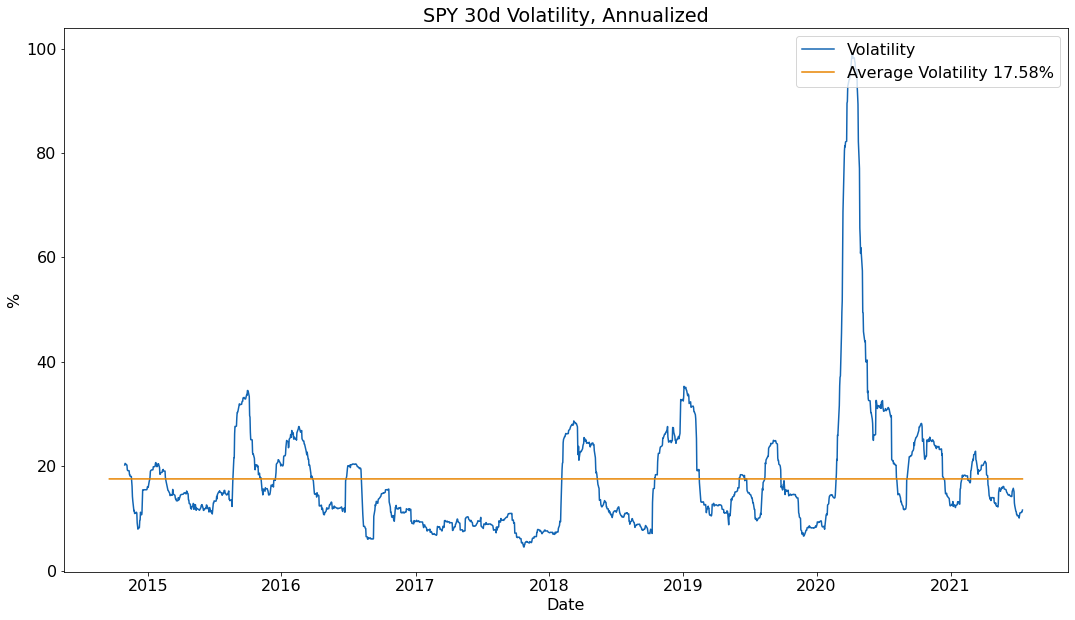

In [96]:
# x-axis & y-axis values
x = volatilityspy.index
y = volatilityspy['Close%']
z = volatilityspy['Average Volatility']

# create a figure and axes
fig, ax = plt.subplots()


fig.set_figwidth(18)
fig.set_figheight(10)
  
# setting title to graph
ax.set_title('SPY 30d Volatility, Annualized')
  
# label x-axis and y-axis
ax.set_ylabel('%')
ax.set_xlabel('Date')
  
# function to plot and show graph

plt.plot(x, y, "#1265b3", label = 'Volatility')

plt.plot(x, z, "#e88400", label = 'Average Volatility 17.58%')
plt.legend(loc='upper right')

#ax.plot(x, y, z)
plt.show()

In [ ]:
fig.savefig('volatilitySPY.jpeg', dpi=400, bbox_inches='tight')